## 0. Import Modules and Data

In [10]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader.data as web
import datetime as dt

In [5]:
import Portfolio as port # This is from the Portfolio.py file with the different classes defined

## 1. Set-up Portfolio Strategy

In [7]:
# Define start date and end date

start_date = '2018-01-01'

end_date = '2020-01-01'

In [8]:
# Define Shares

# Provide the name of the ticker and type (Equity or Bond)

voo = port.Share('VOO', 'Equity')
bnd = port.Share('BND', 'Bond')

In [9]:
voo.get_value(start_date)

247.09

In [14]:
voo.get_value('2019-10-31')

278.55

In [20]:
# Need a way to group the different shares together

shares_list = [voo, bnd]

shares_dict = {}

for share in shares_list:
    shares_dict[share.name] = share.type


In [21]:
shares_dict

{'VOO': 'Equity', 'BND': 'Bond'}

In [16]:
# Define Strategy

# Provide the equity distribution, the bond distriubtion, cash distribution, and the threshold
strat = port.Strategy(50,50,0,5)

In [17]:
# Run portfolio with set start and end dates

portfolio = port.Portfolio()

portfolio.initial_buy(500, strat, start_date)

NameError: name 'voo' is not defined

In [22]:
# import sys
# !{sys.executable} -m pip install pandas_datareader

In [ ]:
## This is useful:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [29]:
bnd = web.DataReader('BND', 'yahoo', start='2015-10-30', end='2020-10-30')

In [30]:
sp = web.DataReader('VOO', 'yahoo', start='2015-10-30', end='2020-10-30')

In [31]:
sp.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-30,192.000000,190.559998,191.820007,190.559998,2011600.0,172.480896
2015-11-02,193.089996,190.850006,190.979996,192.820007,2403500.0,174.526489
2015-11-03,194.059998,192.279999,192.539993,193.429993,3920400.0,175.078613


In [32]:
bnd.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-30,81.790001,81.589996,81.610001,81.790001,1474100.0,71.349808
2015-11-02,81.540001,81.410004,81.440002,81.459999,2939200.0,71.209091
2015-11-03,81.440002,81.260002,81.400002,81.320000,3997100.0,71.086739


In [37]:
bnd.loc['2017-07-07']['High']

81.38999938964844

In [33]:
# Import dividend records
bnd_div = web.DataReader('BND', 'yahoo-dividends', start='2015-10-30', end='2020-10-30')
sp_div = web.DataReader('VOO', 'yahoo-dividends', start='2015-10-30', end='2020-10-30')

In [34]:
bnd_div.head(3)

,action,value
2020-10-01,DIVIDEND,0.150
2020-09-01,DIVIDEND,0.153
2020-08-03,DIVIDEND,0.159


In [35]:
sp_div.head(3)

,action,value
2020-09-29,DIVIDEND,1.309
2020-06-29,DIVIDEND,1.433
2020-03-10,DIVIDEND,1.178


In [44]:
sp_div.value.loc['2020-09-29']

2020-09-29    1.309
Name: value, dtype: float64

In [40]:
sp_div[sp_div.index < pd.to_datetime('2016-01-01')]

,action,value
2015-12-21,DIVIDEND,1.092


In [42]:
sp_div.index

DatetimeIndex(['2020-09-29', '2020-06-29', '2020-03-10', '2019-12-23',
               '2019-09-26', '2019-06-27', '2019-03-21', '2018-12-17',
               '2018-09-26', '2018-06-28', '2018-03-26', '2017-12-26',
               '2017-09-20', '2017-06-23', '2017-03-22', '2016-12-22',
               '2016-09-13', '2016-06-21', '2016-03-21', '2015-12-21'],
              dtype='datetime64[ns]', freq=None)

In [38]:
str('sp')+str('_div')

'sp_div'

In [60]:
Assets = {}
Assets['Bonds'] = bnd
Assets['Equities'] = sp

In [ ]:
Dividends

In [ ]:
# Maybe it is worth merging the dividend and share price files together for easier reference?
# Or build a dictionary to allow easy mapping?

## 1. Calculate Value Given a Start and End Date

In [ ]:
start_date = '2015-11-20'
end_date = 

In [54]:
def calc_value(share, divs, start, end, initial_value):
    # Take the average of the day's high and low for starting share price
    num_shares = initial_value/np.mean([share.loc[start]['Low'],share.loc[start]['High']])
    divs = divs[(divs.index <= pd.to_datetime(end)) & (divs.index >= pd.to_datetime(start))]
    for date in divs.index:
        price = np.mean([share.High.loc[date], share.Low.loc[date]])
        div_value = divs.value.loc[date]
        num_shares += div_value/price
    output = {}
    output['Value'] = num_shares*np.mean([share.loc[end]['Low'],share.loc[end]['High']])
    output['ROI'] = output['Value']-initial_value
    return(output)
    
    # Will need to factor in other actions later, but this will work for now
    
    


In [55]:
calc_value(sp,sp_div, '2015-11-20', '2017-11-20',100)

{'Value': 133.28364759192766, 'ROI': 33.28364759192766}

In [56]:
calc_value(bnd,bnd_div, '2015-11-20', '2017-11-20',100)

{'Value': 104.92672734027568, 'ROI': 4.926727340275676}

<AxesSubplot:xlabel='Date'>

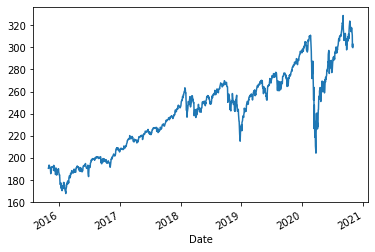

In [58]:
sp.Close.plot()

<AxesSubplot:xlabel='Date'>

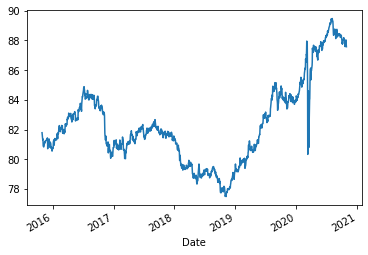

In [59]:
bnd.Close.plot()

In [ ]:
# Identify the ROI with different asset distributions

In [148]:
class Share:

    def __init__(self, name, asset_type):
        """Initialize attributes."""
        self.name = name
        self.type = asset_type
        #self.amount = amount
        
    def get_value(self, date):
        df = web.DataReader(self.name, 'yahoo', start=date, end=date)
        return round(df.loc[date,'Close'],2)
    

In [157]:
bnd = Share('BND','Bond')

In [158]:
sp = Share('VOO','Equity')

In [159]:
class Strategy:
    
    def __init__(self,equity_distribution, bond_distribution, cash_distribution, threshold):
        self.equity_distribution = equity_distribution
        self.bond_distribution = bond_distribution
        self.cash_distribution = 100-(equity_distribution+bond_distribution)
        self.threshold = threshold
    

In [160]:
class Portfolio:
    
    def __init__(self):
        self.shares = {}
        self.log = {}
        self.cash_bal = 0
        self.asset_split = {'Equities': None,'Bonds': None,'Cash': None}
        self.asset_values = {'Equities': None,'Bonds': None,'Cash': None}
        
    def buy(self, share, amount, date):
        purchase_price = share.get_value(date)
        shares = amount/purchase_price
        # Record the transaction
        self.log[len(self.log)] = ['Buy',share,amount,purchase_price,shares,date]
        # Add the number of shares
        if share in self.shares:
            self.shares[share] += shares
        elif share not in self.shares:
            self.shares[share] = shares
            
    def sell(self, share, amount, date):
        sell_price = share.get_value(date)
        shares = amount/sell_price
        # Record the transaction
        self.log[len(self.log)] = ['Sell',share,amount,sell_price,shares,date]
        # Add the number of shares
        if share in self.shares:
            self.shares[share] -= shares
        elif share not in self.shares:
            self.shares[share] = shares
        cash_bal += amount
        
            
    def get_value(self,date):
        value = self.cash_bal
        # Iterate through the 'shares' attribute and get the current value for each 'Share' object
        for share in self.shares:
            value += share.get_value(date)*self.shares[share]
        return(value)
    
    def get_asset_values(self,date):
        bond_val = 0
        eq_val = 0
        for share in self.shares:
            if share.type == 'Bond':
                bond_val += share.get_value(date)*self.shares[share]
            elif share.type == 'Equity':
                eq_val += share.get_value(date)*self.shares[share]
        total = bond_val+eq_val+self.cash_bal
        self.asset_values = {'Equities': eq_val,'Bonds': bond_val,'Cash': self.cash_bal}
        self.asset_split = {'Equities': (eq_val/total)*100,'Bonds': (bond_val/total)*100,'Cash': (self.cash_bal/total)*100}
            
        
    

In [161]:
portfolio = Portfolio()

In [ ]:
portfolio.get_value)

In [162]:
# Calculate portfolio value

start_date = '2015-11-20'
end_date = '2020-11-20'

portfolio.buy(sp,750,start_date)
portfolio.buy(bnd,250,start_date)

portfolio.get_value(end_date)

1547.8221207246306

In [163]:
bond = web.DataReader('BND', 'yahoo', start='2015-10-30', end='2020-10-30')

In [164]:
dates = list(bond.index)

In [165]:
dates = [x.strftime('%Y-%m-%d') for x in dates]

In [166]:
# Deploy balancing strategy

strategy = Strategy(75,25,0,1)

# Initial Purchase (manually allocated proportions)
portfolio = Portfolio() 
portfolio.buy(sp,750,start_date)
portfolio.buy(bnd,250,start_date)

for date in dates:
    portfolio.get_asset_values(date)
    if portfolio.asset_split['Equities'] > strategy.equity_distribution+strategy.threshold:
        amount_to_sell = (portfolio.asset_split['Equities']-strategy.equity_distribution)*portfolio.asset_values['Equities']
        portfolio.sell(sp,amount_to_sell,date)
        portfolio.buy(bnd,amount_to_sell,date)
        

    

UnboundLocalError: local variable 'cash_bal' referenced before assignment

In [139]:
portfolio.get_asset_values('2019-10-29')

In [141]:
portfolio.asset_split['Equities']

80.83255175854521